In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


In [2]:
#reading data
median_house_hold_in_come = pd.read_csv(r"C:\Users\yagiz\Desktop\data\fatal_police\MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv(r"C:\Users\yagiz\Desktop\data\fatal_police\PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highschool = pd.read_csv(r"C:\Users\yagiz\Desktop\data\fatal_police\PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_rate_city = pd.read_csv(r"C:\Users\yagiz\Desktop\data\fatal_police\ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv(r"C:\Users\yagiz\Desktop\data\fatal_police\PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [5]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [6]:
percentage_people_below_poverty_level.poverty_rate.replace(["-"], np.nan, inplace=True)
percentage_people_below_poverty_level.dropna(inplace=True)
percentage_people_below_poverty_level.poverty_rate.value_counts()


0       1464
7.4      129
6.7      129
10.9     128
10       128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 770, dtype: int64

In [7]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)


In [8]:

area_list = list(percentage_people_below_poverty_level["Geographic Area"].unique())
area_poverty_ratio = []


In [9]:
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level["Geographic Area"] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

In [10]:
data = pd.DataFrame({"area_list": area_list, "area_poverty_ratio": area_poverty_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

Text(0.5, 1.0, 'Poverty Rate Given States')

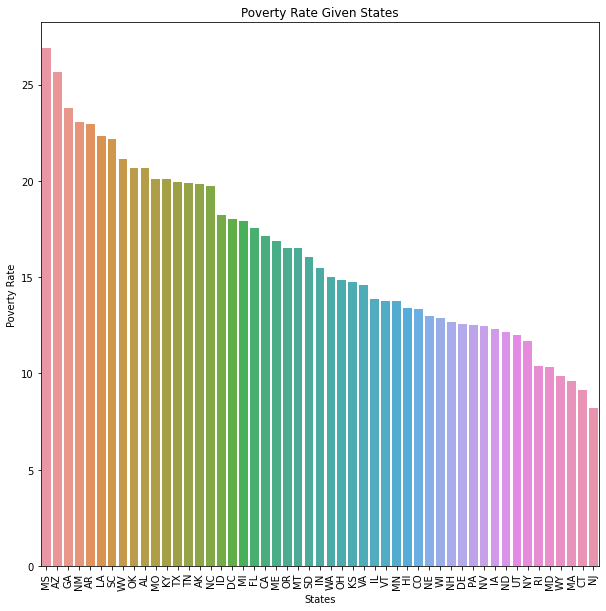

In [11]:
plt.figure(figsize=(10, 10))
sns.barplot(x = sorted_data["area_list"], y = sorted_data["area_poverty_ratio"])
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")

In [12]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
seperate = kill.name[kill.name != "TK TK"].str.split()
print(seperate)
a, b = zip(*seperate)
name_list = a + b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
print(most_common_names)
x, y = zip(*most_common_names)
x, y = list(x), list(y)


0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2529      [Brian, J., Skinner]
2530      [Rodney, E., Jacobs]
2532    [Dennis, W., Robinson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2486, dtype: object
[('Michael', 91), ('David', 57), ('James', 56), ('Robert', 48), ('Joseph', 48), ('William', 47), ('Daniel', 46), ('John', 42), ('Christopher', 40), ('Lee', 37), ('Richard', 36), ('J.', 32), ('Anthony', 31), ('Jose', 28), ('Joshua', 28)]


Text(0.5, 1.0, 'Most common 15 people name or surname')

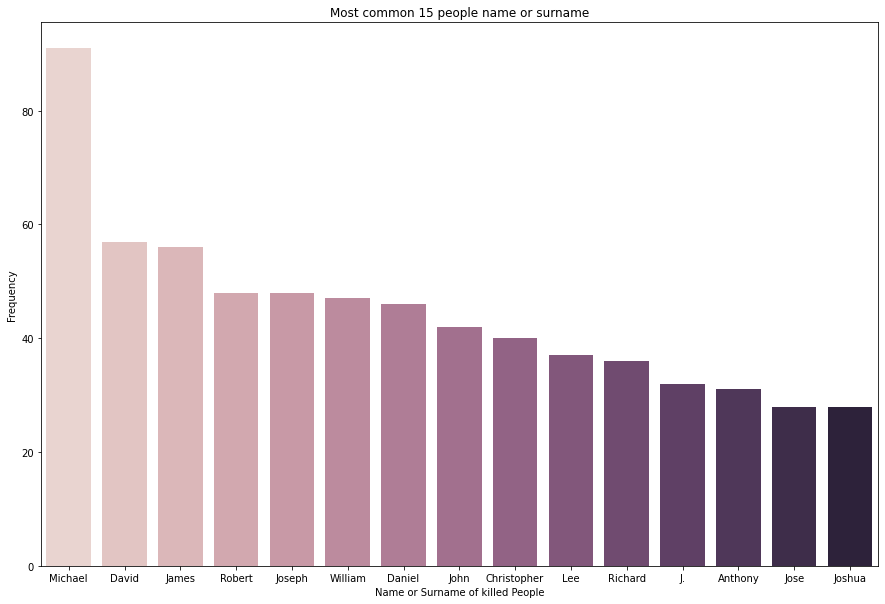

In [14]:

plt.figure(figsize=(15, 10))
ax = sns.barplot(x = x, y = y, palette= sns.cubehelix_palette(len(x)))
plt.xlabel("Name or Surname of killed People")
plt.ylabel("Frequency")
plt.title("Most common 15 people name or surname")

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

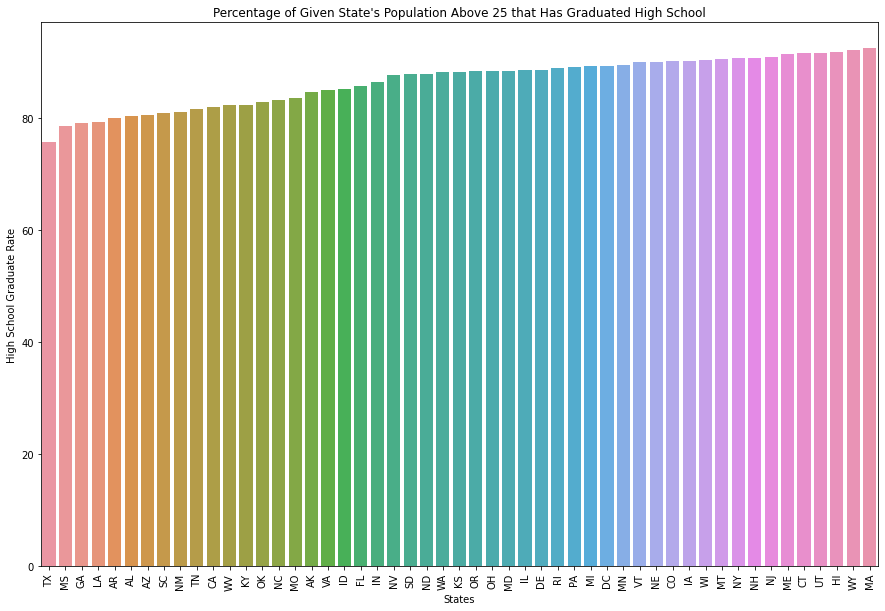

In [24]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highschool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highschool.percent_completed_hs = percent_over_25_completed_highschool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highschool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highschool[percent_over_25_completed_highschool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [25]:
share_rate_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [26]:
share_rate_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0.5, 0, 'Percentage Of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races")]

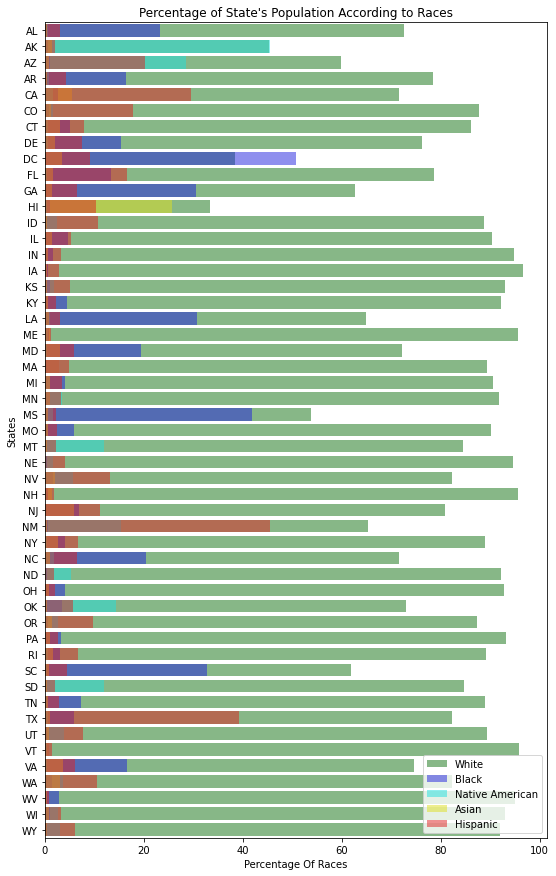

In [29]:
share_rate_city.replace(["-"], 0.0, inplace=True)
share_rate_city.replace("(X)", 0.0, inplace=True)
share_rate_city.loc[:, ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]] = share_rate_city.loc[:, ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]].astype(float)
area_list = list(share_rate_city["Geographic area"].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

for i in area_list:
    x = share_rate_city[share_rate_city["Geographic area"] == i]
    share_white.append(sum(x.share_white) / len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))


f, ax = plt.subplots(figsize = (9, 15))
sns.barplot(x = share_white, y = area_list, color = "green", alpha = 0.5, label = "White")
sns.barplot(x = share_black, y = area_list, color = "blue", alpha = 0.5, label = "Black")
sns.barplot(x = share_native_american, y = area_list, color = "cyan", alpha = 0.5, label = "Native American")
sns.barplot(x = share_asian, y = area_list, color = "yellow", alpha = 0.5, label = "Asian")
sns.barplot(x = share_hispanic, y = area_list, color = "red", alpha = 0.5, label = "Hispanic")


ax.legend(loc = "lower right", frameon = True)
ax.set(xlabel= "Percentage Of Races", ylabel="States", title= "Percentage of State's Population According to Races")


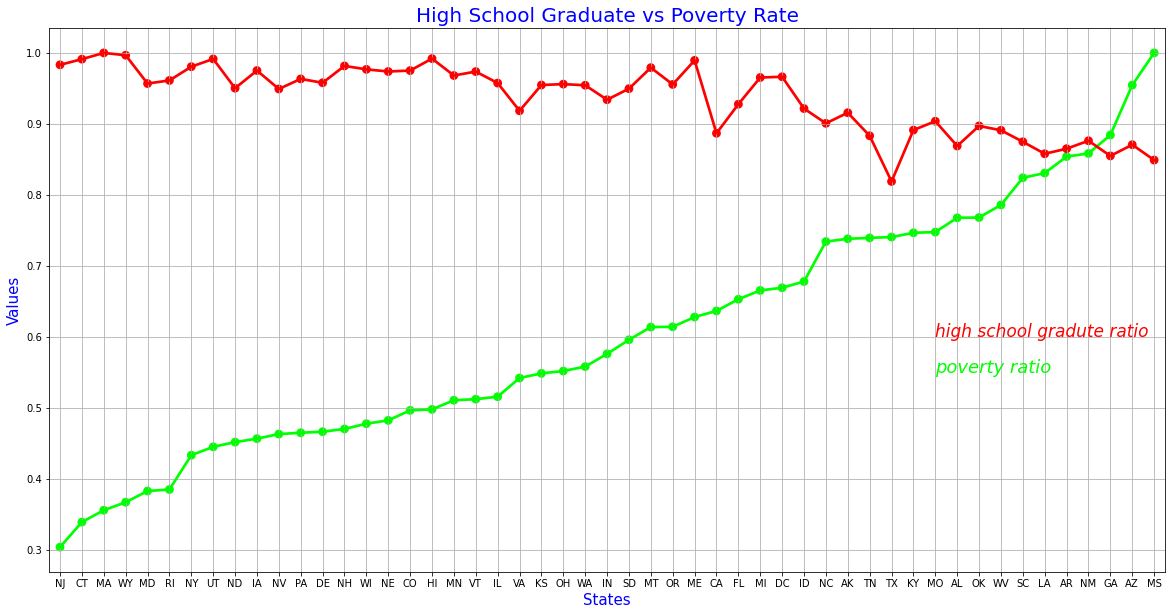

In [30]:
sorted_data["area_poverty_ratio"] = sorted_data["area_poverty_ratio"] / max(sorted_data["area_poverty_ratio"])
sorted_data2["area_highschool_ratio"] = sorted_data2["area_highschool_ratio"] / max(sorted_data2["area_highschool_ratio"])

data = pd.concat([sorted_data, sorted_data2["area_highschool_ratio"]], axis=1)
data.sort_values("area_poverty_ratio", inplace=True)

f, ax1 = plt.subplots(figsize = (20, 10))
sns.pointplot(x = "area_list", y = "area_poverty_ratio", data=data, color="lime", alpha = 0.8)
sns.pointplot(x = "area_list", y = "area_highschool_ratio", data=data, color = "red", alpha = 0.8)
plt.text(40, 0.6, "high school gradute ratio", color = "red", fontsize = 17, style = "italic")
plt.text(40, 0.55, "poverty ratio", color = "lime", fontsize = 18, style="italic")
plt.xlabel("States", fontsize = 15, color = "blue")
plt.ylabel("Values", fontsize = 15, color = "blue")
plt.title("High School Graduate vs Poverty Rate", fontsize = 20, color = "blue")
plt.grid()


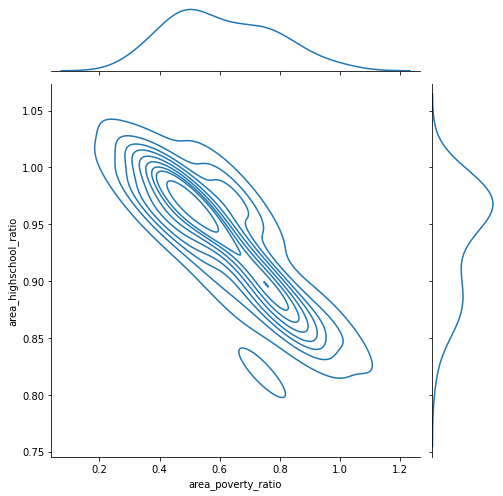

In [35]:
g = sns.jointplot(x = data.area_poverty_ratio, y = data.area_highschool_ratio, kind="kde", height = 7)


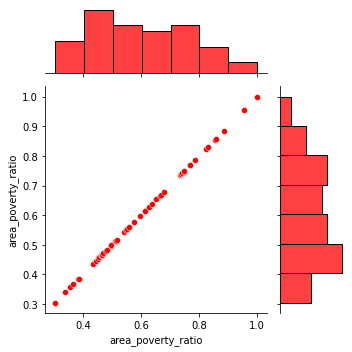

In [34]:
g = sns.jointplot(x = "area_poverty_ratio", y = "area_poverty_ratio", data=data, height=5, ratio=3, color = "r")

Text(0.5, 1.0, 'Killed People According to Races')

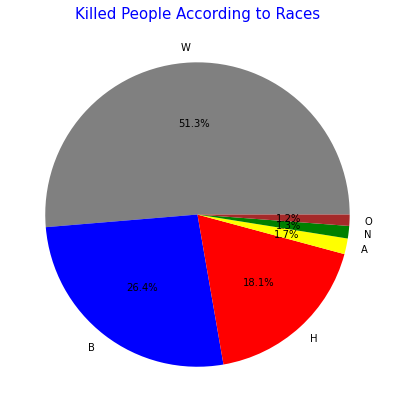

In [36]:
kill.race.dropna(inplace=True)
labels = kill.race.value_counts().index
colors = ["grey", "blue", "red", "yellow", "green", "brown"]
explode = [0, 0, 0, 0, 0, 0]
sizes = kill.race.value_counts().values

plt.figure(figsize = (7, 7))
plt.pie(sizes, explode=explode, labels = labels, colors=colors, autopct="%1.1f%%")
plt.title("Killed People According to Races", color = "blue", fontsize = 15)

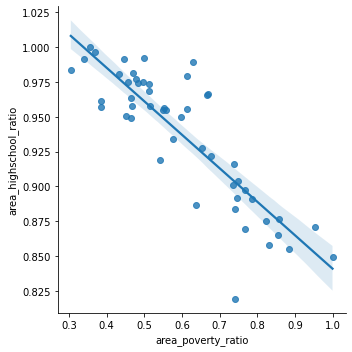

In [37]:
sns.lmplot(x="area_poverty_ratio", y = "area_highschool_ratio", data=data)
plt.show()

<AxesSubplot:xlabel='area_poverty_ratio', ylabel='area_highschool_ratio'>

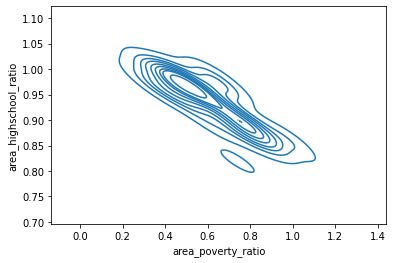

In [40]:
sns.kdeplot(x = data.area_poverty_ratio, y = data.area_highschool_ratio, shade=False, cut=5)


<AxesSubplot:>

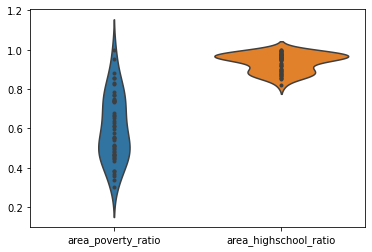

In [41]:
sns.violinplot(data=data, inner="points")

In [43]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.861672
area_highschool_ratio,-0.861672,1.000000


<AxesSubplot:>

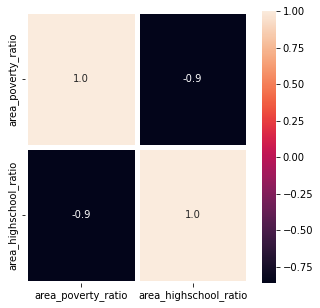

In [42]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=5, fmt=".1f", ax=ax)


<AxesSubplot:xlabel='gender', ylabel='age'>

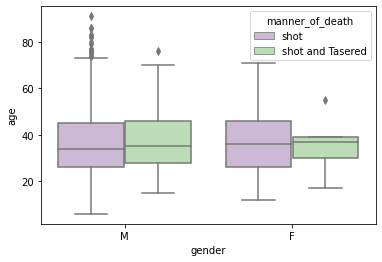

In [44]:
sns.boxplot(x="gender", y="age", hue = "manner_of_death", data=kill, palette="PRGn")

c:\Users\yagiz\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='gender', ylabel='age'>

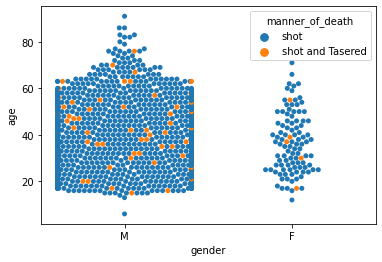

In [45]:
sns.swarmplot(x = "gender", y = "age", hue="manner_of_death", data=kill)

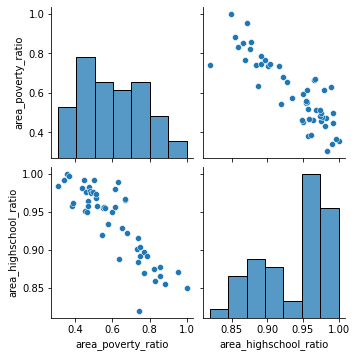

In [46]:
sns.pairplot(data)